# Libs Loading

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')

import polars as pl
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split, cross_val_score
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


import data_loading_functions as dlf
import feature_engineering_pl as fepl
import cleaning_functions as clf
import modeling_functions as mlf

ModuleNotFoundError: No module named 'data_loading_functions'

# 0. Data Loading

In [51]:
df_data = dlf.load_data_pl()
df_data.head(3)

load_data_pl              -- OK. Time elapsed: 0 min 15 sec


id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
i32,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,bool,bool,bool,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,bool,bool
0,1,18,9,2,3,16,10,11,3,3,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,true,true,true,0,0,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,false,false
0,2,18,9,14,14,12,12,0,3,3,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,true,true,true,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,3,4,1,false,false
0,3,18,9,4,8,1,11,11,0,5,2,8,6,16,5,4,8,1,1,1,1,1,15,2,17,false,true,true,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,2,3,1,true,true


In [5]:
# df_target = dlf.load_target_pl()
# df_target

load_target_pl            -- OK. Time elapsed: 0 min 0 sec


id,flag
i32,i8
0,0
1,0
2,0
3,0
4,0
…,…
2999995,0
2999996,0
2999997,0


# 2. Feature Gambling

In [97]:
df_feat = df_data.clone()
df_feat.shape

(26162717, 60)

In [98]:
df_feat = fepl.horizontal_sum(df_feat)

horizontal_sum            -- OK. Time elapsed: 0 min 0 sec


In [99]:
df_feat = fepl.grouping_features(df_feat)

grouping_features         -- OK. Time elapsed: 0 min 3 sec


False

In [100]:
df_feat = fepl.combined_features(df_feat)

combined_features         -- OK. Time elapsed: 0 min 0 sec


False

In [101]:
df_feat = fepl.pl_featuretools(df_feat)

pl_featuretools           -- OK. Time elapsed: 0 min 36 sec


False

In [102]:
df_feat = clf.remove_hi_corr_feats(df_feat)

remove_hi_corr_feats      -- OK. Time elapsed: 0 min 31 sec


In [103]:
df_combined = dlf.load_target(df_feat)
df_to_model = clf.convert_to_pandas(df_combined)

target_loading            -- OK. Time elapsed: 0 min 0 sec
to_pandas                 -- OK. Time elapsed: 0 min 0 sec


In [104]:
df_to_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Columns: 183 entries, id to flag
dtypes: float32(116), int16(10), int32(1), int8(56)
memory usage: 1.5 GB


In [105]:
model, score = mlf.get_model_and_score(df_to_model)
score

Default metric period is 5 because AUC is/are not implemented for GPU


get_model_and_score       -- OK. Time elapsed: 2 min 46 sec


0.758034378456129

In [14]:
# df_feat_pd = df_feat.to_pandas()
# df_target_pd = df_target.to_pandas()
# df_feat_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Columns: 180 entries, id to outstnd_grpd + is0_tot_std
dtypes: float32(114), int16(11), int32(1), int8(54)
memory usage: 1.5 GB


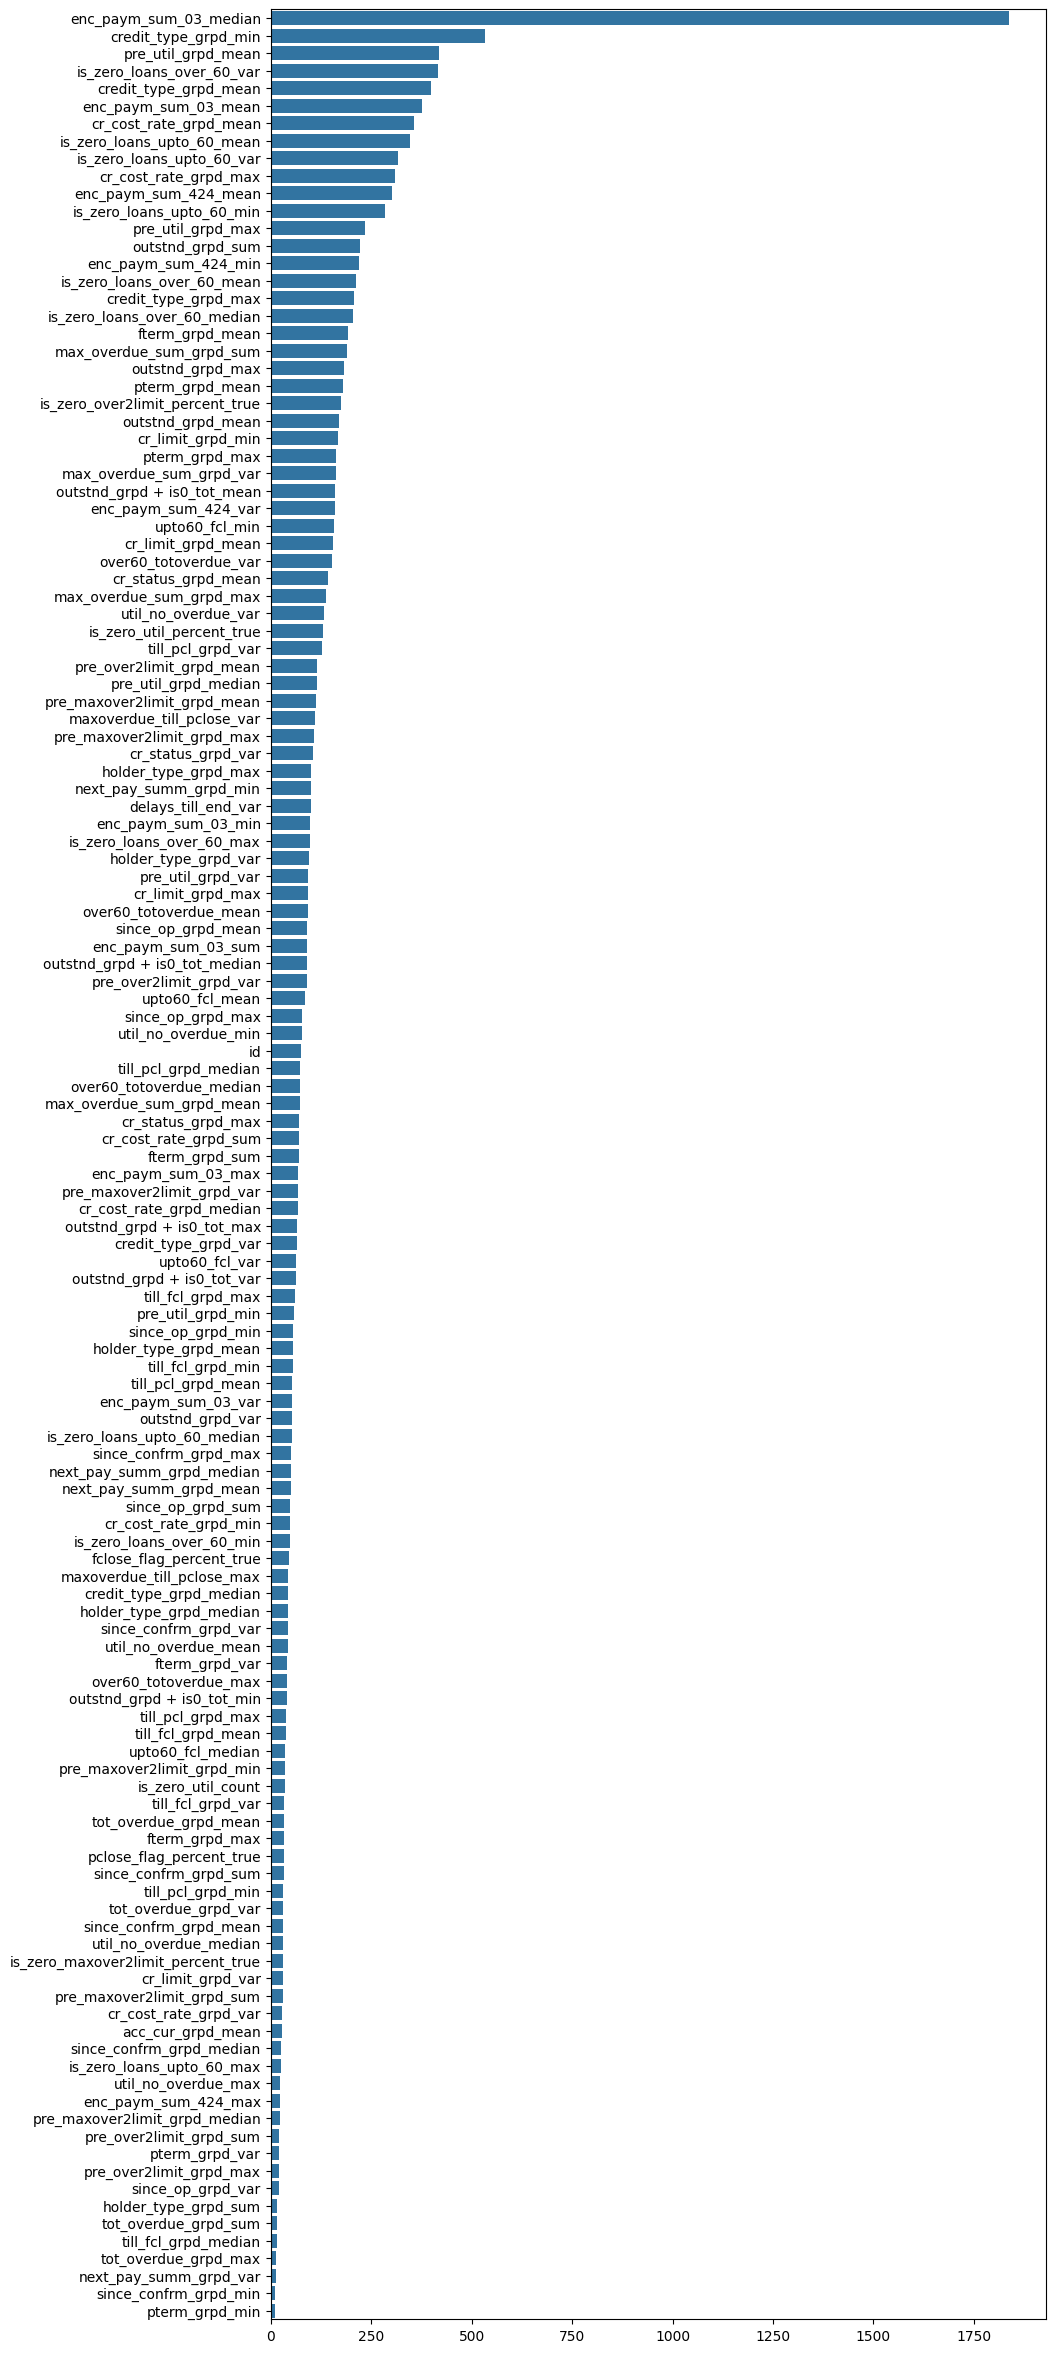

In [15]:
# from xgboost import XGBClassifier
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Данные
# X_cut = df_feat_pd
# y_cut = df_target_pd['flag']

# # Создание и обучение модели
# xgb = XGBClassifier(
#     n_estimators=1000,
#     max_depth=4,
#     learning_rate=0.012,
#     random_state=137,
#     verbosity=0,
#     eval_metric='auc',
#     tree_method='gpu_hist',
#     enable_categorical=True
# )

# xgb.fit(X_cut, y_cut)

# # Получение важности признаков
# feature_importance = xgb.get_booster().get_score(importance_type='gain')

# # Сортировка важности признаков
# best_features_sorted = dict(
#     sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)
# )

# # Визуализация важности признаков
# plt.figure(figsize=(10, 30))
# sns.barplot(
#     x=list(best_features_sorted.values()), 
#     y=list(best_features_sorted.keys())
# );



In [16]:
# Фильтрация признаков для нового DataFrame
feats_to_df_model = [feat for feat, val in best_features_sorted.items() if val > .5]
df_squeezed = X_cut[feats_to_df_model].copy()
df_squeezed['flag'] = df_target_pd['flag']

# Размер итогового DataFrame
print(df_squeezed.shape)

(3000000, 133)


# 3. Modeling

In [17]:
X = df_squeezed.drop(columns=['flag'])
y = df_squeezed.flag

# X = df_feat_pd
# y = df_target_pd.flag


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, stratify=y, random_state=137, shuffle=True
)

In [18]:
message = 'minor changes in fepl'

In [21]:
best_params_df = pd.read_csv('../data/best_params_3M_pl.csv')
best_params = best_params_df.to_dict(orient='records')[0]

cbc_best = CatBoostClassifier(
    **best_params,
    random_seed=137,
    eval_metric='AUC',
    task_type='GPU',
    logging_level='Silent',
    auto_class_weights='SqrtBalanced'
    # cat_features=[i for i in X.columns if X[i].dtype == "category"],
    # iterations=1400,
    # max_depth=5,
    # learning_rate=.13,
    # l2_leaf_reg=.002,
    # border_count=87,
    # random_strength=.04,
    # bagging_temperature=0.06
)

cbc_best.fit(X_train, y_train)
y_pred = cbc_best.predict_proba(X_test)[:, 1]

score = roc_auc_score(y_test, y_pred)
with open("results.txt", "a") as f:
    string = f"AUC with {message:40}: {score:.2%}"
    print(string)
    f.write(f"\n{type(cbc_best).__name__}\n{string}\n")
# fef.playsound()

Default metric period is 5 because AUC is/are not implemented for GPU


AUC with minor changes in fepl                   : 75.79%


In [ ]:
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances


def objective(trial):
    params = {
        # "cat_features": [i for i in X.columns if X[i].dtype == 'category'],
        "iterations": trial.suggest_int("iterations", 1000, 5000),
        "max_depth": trial.suggest_int("max_depth", 3, 6),
        "learning_rate": trial.suggest_float("learning_rate", .01, .2, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 10, log=True),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "random_strength": trial.suggest_float("random_strength", 1e-3, 10, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 5),
        "eval_metric": "AUC",
        "logging_level": 'Silent',
        "random_seed": 137,
        "task_type": "GPU",  # Для GPU: "GPU"
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 80, 300),
        "grow_policy": "SymmetricTree",
        "one_hot_max_size": trial.suggest_int("one_hot_max_size", 8, 15),
        "leaf_estimation_iterations": trial.suggest_int("leaf_estimation_iterations", 5, 10),
        "leaf_estimation_method": "Gradient",
        "auto_class_weights": "SqrtBalanced",
    }
    
    # Модель
    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=0)
    
    # Оценка качества
    y_pred = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred)
    return auc_score

# Запуск Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best score:', study.best_trial.value)

[I 2024-12-29 18:22:23,330] A new study created in memory with name: no-name-8890c55a-c2a2-408a-ab01-6da30bf6a10f
Default metric period is 5 because AUC is/are not implemented for GPU
[I 2024-12-29 18:23:08,785] Trial 0 finished with value: 0.747543576757561 and parameters: {'iterations': 1682, 'max_depth': 4, 'learning_rate': 0.02760599843752866, 'l2_leaf_reg': 4.644797610634319, 'border_count': 39, 'random_strength': 7.833421869020896, 'bagging_temperature': 0.3698934080182792, 'min_data_in_leaf': 136, 'one_hot_max_size': 9, 'leaf_estimation_iterations': 6}. Best is trial 0 with value: 0.747543576757561.
Default metric period is 5 because AUC is/are not implemented for GPU
[I 2024-12-29 18:24:42,962] Trial 1 finished with value: 0.7567464066972678 and parameters: {'iterations': 3403, 'max_depth': 4, 'learning_rate': 0.15220693412784092, 'l2_leaf_reg': 0.8273132184570275, 'border_count': 107, 'random_strength': 0.8997024870022043, 'bagging_temperature': 1.4297487425271243, 'min_data_i

Number of finished trials: 50
Best trial: {'iterations': 2469, 'max_depth': 6, 'learning_rate': 0.07946271043446697, 'l2_leaf_reg': 0.08241511795199756, 'border_count': 180, 'random_strength': 0.3570390803964154, 'bagging_temperature': 1.0490594249880318, 'min_data_in_leaf': 163, 'one_hot_max_size': 13, 'leaf_estimation_iterations': 10}
Best score: 0.7576888493216979


In [ ]:
df_optuna = study.trials_dataframe()
df_optuna.to_csv("data/optuna_report.csv", index=False)

In [ ]:
values = [trial.value for trial in study.trials if trial.value is not None]

# Вычисление среднего значения
average_score = sum(values) / len(values)

# Вывод
print(f"Среднее значение скоров: {average_score:.2%}")

Среднее значение скоров: 75.46%


In [ ]:
best_params = study.best_trial.params
bp = pd.DataFrame([best_params])
bp.to_csv('data/best_params_3M_pl.csv', index=False)
bp

,iterations,max_depth,learning_rate,l2_leaf_reg,border_count,random_strength,bagging_temperature,min_data_in_leaf,one_hot_max_size,leaf_estimation_iterations
0,2469,6,0.079463,0.082415,180,0.357039,1.049059,163,13,10


In [ ]:
plot_param_importances(study)

In [ ]:
plot_optimization_history(study)

In [22]:
best_params_df = pd.read_csv('../data/best_params_3M_pl.csv')
best_params = best_params_df.to_dict(orient='records')[0]
cbc = CatBoostClassifier(
    **best_params,
    random_seed=137,
    cat_features=[i for i in X.columns if X[i].dtype == "category"],
    logging_level='Silent',
    eval_metric='AUC',
    task_type='GPU',
    auto_class_weights="SqrtBalanced",
    # leaf_estimation_method="Gradient",
    # grow_policy="SymmetricTree",
)

cv = cross_val_score(cbc, X, y, cv=5, scoring='roc_auc')
cv_mean = cv.mean()
with open("results.txt", "a") as f:
    string = f"AUC on CV with {message:40}: {cv_mean:.2%}"
    print(string)
    f.write(f"\n{type(cbc).__name__}\n{string}\n")

# fef.playsound()

Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU


AUC on CV with minor changes in fepl                   : 74.66%


In [23]:
cv

[autoreload of feature_engineering_pl failed: Traceback (most recent call last):
  File "c:\Users\User\skillbox\HOMEWORKS\HWs\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\User\skillbox\HOMEWORKS\HWs\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "c:\Users\User\skillbox\HOMEWORKS\ML Junior\FINAL\source\feature_engineering_pl.py", line 429, in <module>
    df_feat = fepl.cr_cost_rate_grpd(df_feat)
              ^^^^
NameError: name 'fepl' is not defined
]


array([0.76292092, 0.74961332, 0.75297019, 0.74566208, 0.72162197])